In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

balaji = pd.read_csv('Balaji Fast Food Sales.csv')
balaji.info()
balaji.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [74]:
balaji['date'] = balaji['date'].str.replace('/', '-')
balaji['date'] = pd.to_datetime(balaji['date'])
balaji.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-05-03,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-06-10,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [75]:
balaji["transaction_type"] = (
    balaji["transaction_type"]
    .replace(r"^\s*$", pd.NA, regex=True)
    .fillna("Unknown")
)
balaji

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Unknown,Mrs.,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Unknown,Mr.,Evening
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Unknown,Mr.,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Unknown,Mrs.,Afternoon


   order_weekday weekday_name         sum     count
0              0       Monday  835.306122  2.877551
1              1      Tuesday  767.765957  2.595745
2              2    Wednesday  807.600000  3.180000
3              3      Thurday  814.387755  2.775510
4              4       Friday  721.000000  2.680000
5              5     Saturday  729.038462  2.884615
6              6       Sunday  862.156863  3.098039


Text(0, 0.5, 'Amount Of Orders')

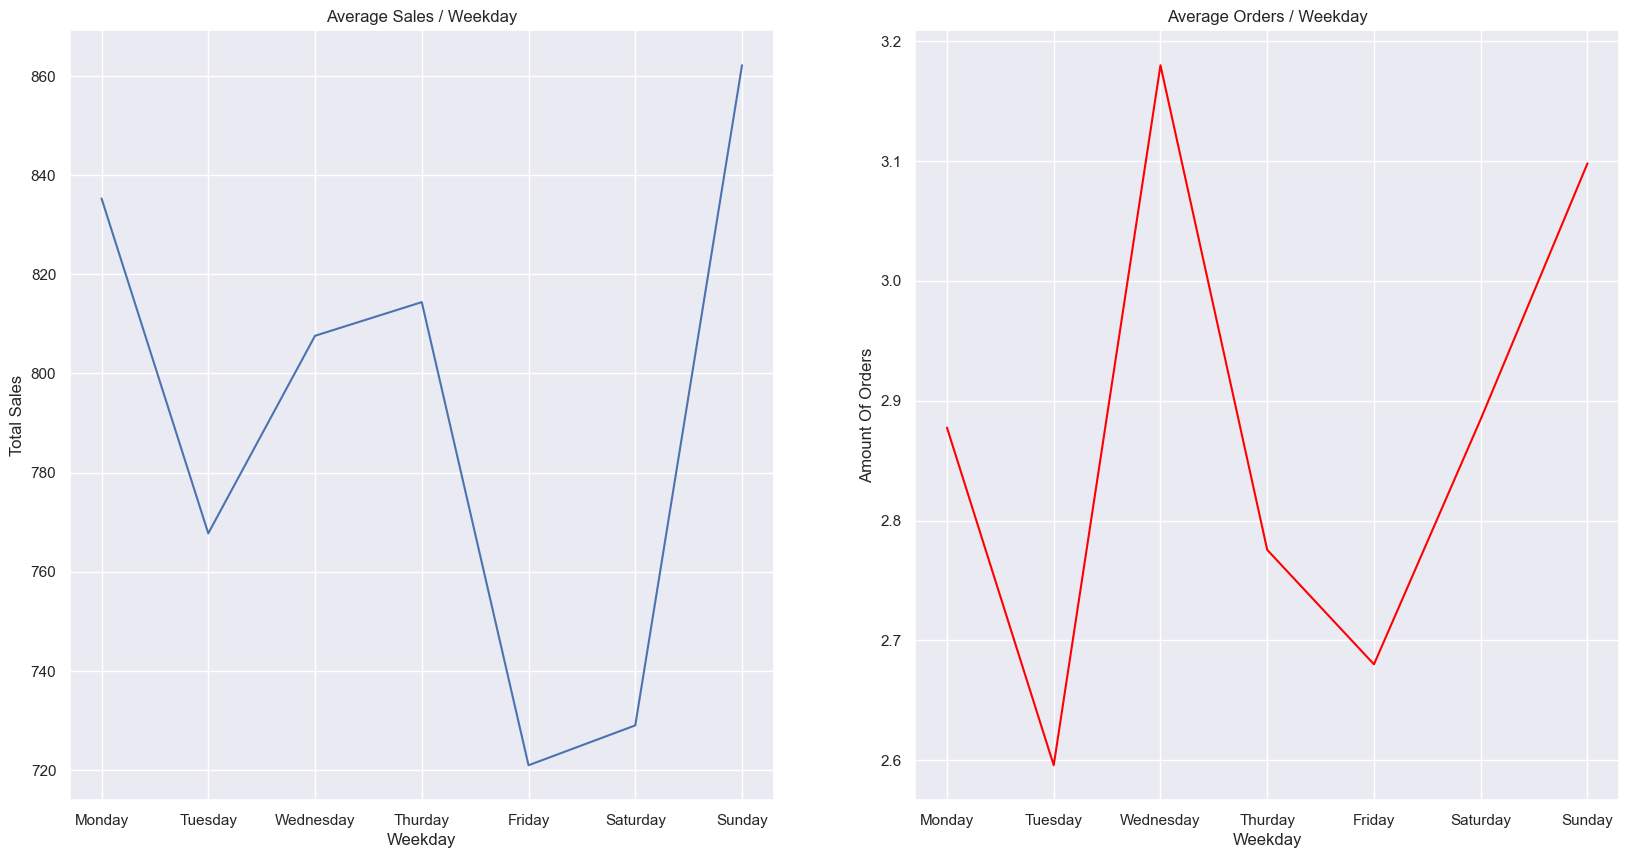

In [ ]:
#subquarrey - total and amount of sales by date
sales_per_date = balaji.groupby('date',as_index=False)['transaction_amount'].agg(['sum','count'])

#adding a weekday to each date
sales_per_date['order_weekday']=sales_per_date['date'].dt.weekday 

#Adding a day number of each weekday, later used to keep day order
day_conversion = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thurday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
sales_per_date['weekday_name']=sales_per_date['order_weekday'].map(day_conversion) 

#Creating a processed data frame that holds all and only the information relevant to the plots we want to show
average_data_by_weekday = sales_per_date.groupby(['order_weekday','weekday_name'],as_index=False).agg({'sum':'mean','count':'mean'})
#Creating line Plot
sns.set_theme()

fig,axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot(average_data_by_weekday['weekday_name'],average_data_by_weekday['sum'])
axs[0].set_title('Average Sales / Weekday')
axs[0].set_xlabel('Weekday')
axs[0].set_ylabel('Total Sales')


axs[1].plot(average_data_by_weekday['weekday_name'],average_data_by_weekday['count'],color='red')
axs[1].set_title('Average Orders / Weekday')
axs[1].set_xlabel('Weekday')
axs[1].set_ylabel('Amount Of Orders')